<a href="https://colab.research.google.com/github/agterzis/Machine-Learning/blob/main/%CE%9C%CE%B7%CF%87%CE%B1%CE%BD%CE%B9%CE%BA%CE%AE_%CE%9C%CE%AC%CE%B8%CE%B7%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Μέρος 1 – Ημι-επιβλεπόμενη Μάθηση

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('wine-missing.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,unknown,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


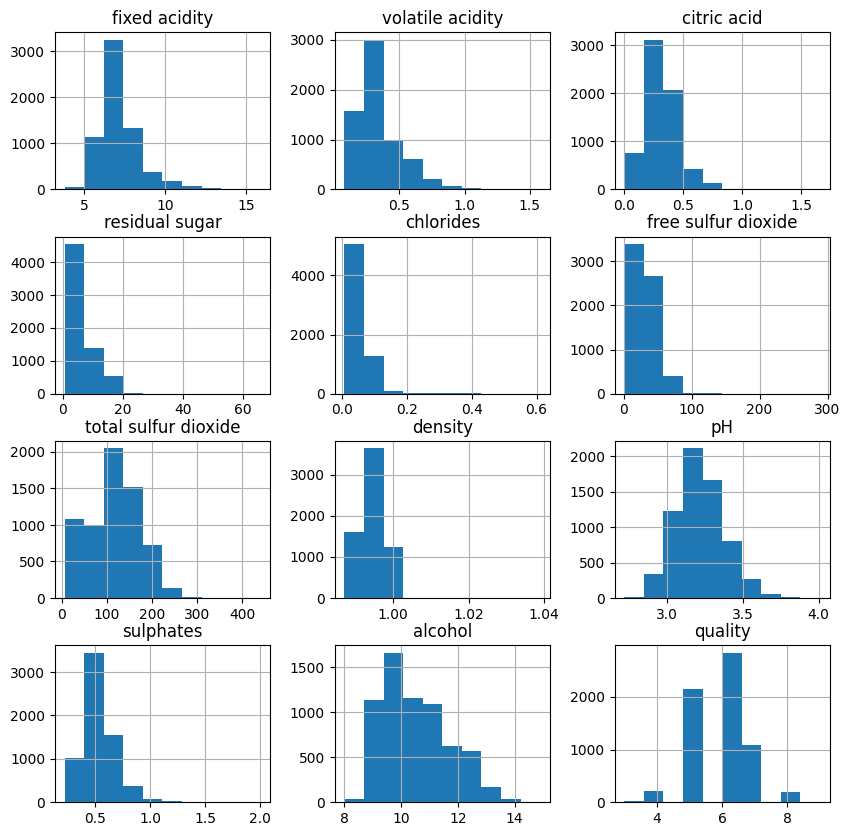

In [3]:
df.hist(figsize=(10, 10))
plt.show()


<Axes: xlabel='type'>

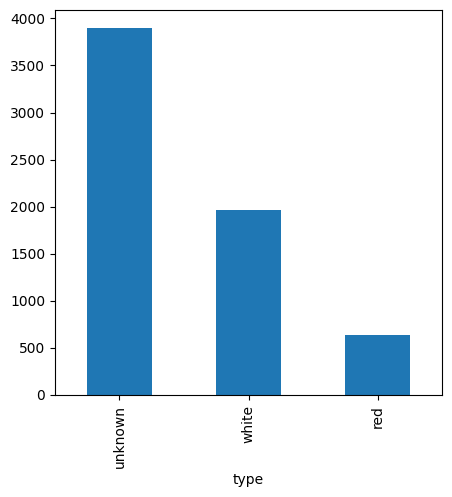

In [4]:
# Bar Plot for ("type")
plt.figure(figsize=(5, 5))
df['type'].value_counts().plot(kind='bar')

In [5]:
missing_values = df.isnull().sum()
print("Χαρακτηριστικό      Πλήθος ελλειπών τιμών:\n-------------------------------------\n", missing_values)


Χαρακτηριστικό      Πλήθος ελλειπών τιμών:
-------------------------------------
 type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [8]:
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
missing_values = df.isnull().sum()
print("Χαρακτηριστικό      Πλήθος ελλειπών τιμών:\n-------------------------------------\n", missing_values)

Χαρακτηριστικό      Πλήθος ελλειπών τιμών:
-------------------------------------
 type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
df['type'] = df['type'].map({'white': 0, 'red': 1, 'unknown': 2})
x = df.drop(columns=['type']).values
y = df['type'].values

In [10]:
known_mask = df['type'] != 2  # Γνωστά δεδομένα
unknown_mask = df['type'] == 2  # Άγνωστα δεδομένα

x_known = x[known_mask]
y_known = y[known_mask]
x_unknown = x[unknown_mask]

In [14]:
# Διαχωρισμός δεδομένων και training
x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known, test_size=0.3, random_state=0, stratify=y_known
)

In [15]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [16]:
y_pred = clf.predict(x_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9935897435897436
F1 Score: 0.9935840982423545
Precision: 0.993582848941563
Recall: 0.9935897435897436


**Accuracy vs F1 Score**

Το Accuracy μετρά τη συνολική ακρίβεια, ενώ το F1 Score είναι πιο ευαίσθητο σε μη ισορροπημένα δεδομένα επειδή συνδυάζει το Precision και το Recall.

Στο παρόν dataset, λόγω της ισορροπίας των κλάσεων και οι δύο μετρήσεις, Accuracy και F1 Score, είναι εξίσου αντιπροσωπευτικές. Σε περίπτωση μη ισορροπημένων δεδομένων, θα προτιμούσαμε το F1 Score.

In [18]:
# Επανεκπαίδευση του μοντέλου με class_weight='balanced'
clf_balanced = RandomForestClassifier(random_state=0, class_weight='balanced')
clf_balanced.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

Η παράμετρος class_weight='balanced' στο Random Forest αυξάνει τη βαρύτητα των δειγμάτων στις λιγότερο συχνές κλάσεις για να διορθώσει τη μεροληψία στα μη ισορροπημένα δεδομένα.

In [20]:
# Επανεκπαίδευση
y_pred_balanced = clf_balanced.predict(x_test)

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced, average='weighted')
precision_balanced = precision_score(y_test, y_pred_balanced, average='weighted')
recall_balanced = recall_score(y_test, y_pred_balanced, average='weighted')

print("Με class_weight='balanced'")
print("Accuracy:", accuracy_balanced)
print("F1 Score:", f1_balanced)
print("Precision:", precision_balanced)
print("Recall:", recall_balanced)

Με class_weight='balanced'
Accuracy: 0.9948717948717949
F1 Score: 0.9948627235660897
Precision: 0.9948713374047896
Recall: 0.9948717948717949


In [24]:
# Πιθανότητες για τα άγνωστα δείγματα

y_unknown_prob = clf_balanced.predict_proba(x_unknown)
print(y_unknown_proba)

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]]


In [26]:
# Ετικέτες για τα άγνωστα δεδομένα

y_unknown_pred = []
for prob in y_unknown_prob:
    if prob[1] > 0.65:
        y_unknown_pred.append(1)  # red
    else:
        y_unknown_pred.append(0)  # white

In [27]:
y_unknown_pred = np.array(y_unknown_pred)
print("Ετικέτες για τα άγνωστα δείγματα:", y_unknown_pred)

Ετικέτες για τα άγνωστα δείγματα: [0 0 0 ... 1 1 1]


In [28]:
# Ένωση συνόλων
x_combined = np.vstack((x_train, x_unknown))
y_combined = np.concatenate((y_train, y_unknown_pred))

In [29]:
# Επανεκπαίδευση Random Forest
clf_final = RandomForestClassifier(random_state=0, class_weight='balanced')
clf_final.fit(x_combined, y_combined)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [32]:
y_final_pred = clf_final.predict(x_test)
final_accuracy = accuracy_score(y_test, y_final_pred)

print("Ακρίβεια test set μετά την επανεκπαίδευση:", final_accuracy)

Ακρίβεια test set μετά την επανεκπαίδευση: 0.9935897435897436
